In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.callbacks import EarlyStopping
from keras.metrics import MeanAbsoluteError, RootMeanSquaredError

In [4]:
import statsmodels.api as sm

In [5]:
#Load train data
cars_processed_train_path ='data/processed_train.csv'
cars_train_df = pd.read_csv(cars_processed_train_path,index_col=None)
cars_train_df

,id,vehicle_damage,binary_clean_title,turbo,fuel_type_2_Diesel,fuel_type_2_Electric,fuel_type_2_Gasoline,fuel_type_2_Hybrid,fuel_type_2_Other,engine_config_Flat,...,speed_9.0,speed_10.0,ext_col_price_bin,int_col_price_bin,brand_price_bin,model_year,milage,hp,size,price
0,0,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,1,2007,213000,172.0,1.6,4200
1,1,1.0,1,0,0,0,1,0,0,0,...,0,0,1,1,2,2002,143250,252.0,3.9,4999
2,2,0.0,1,0,0,0,0,0,1,0,...,0,0,1,1,4,2002,136731,320.0,5.3,13900
3,3,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2017,19500,420.0,5.0,45000
4,4,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2021,7388,208.0,2.0,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2017,49000,420.0,6.2,27500
188529,188529,1.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2018,28600,385.0,3.0,30000
188530,188530,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2021,13650,469.0,4.0,86900
188531,188531,0.0,0,0,0,0,0,0,1,0,...,0,0,5,1,3,2022,13895,300.0,3.0,84900


In [6]:
explanatory_variables = list(cars_train_df.columns)
explanatory_variables.remove('id')
explanatory_variables.remove('price')
print("number of explanatory variables: ", len(explanatory_variables))
explanatory_variables

number of explanatory variables:  39


['vehicle_damage',
 'binary_clean_title',
 'turbo',
 'fuel_type_2_Diesel',
 'fuel_type_2_Electric',
 'fuel_type_2_Gasoline',
 'fuel_type_2_Hybrid',
 'fuel_type_2_Other',
 'engine_config_Flat',
 'engine_config_Inline',
 'engine_config_Other',
 'engine_config_V-Type',
 'transmission_type_Automatic',
 'transmission_type_DCT',
 'transmission_type_Manual',
 'transmission_type_Other',
 'cylinder_3.0',
 'cylinder_4.0',
 'cylinder_5.0',
 'cylinder_6.0',
 'cylinder_8.0',
 'cylinder_10.0',
 'cylinder_12.0',
 'speed_1.0',
 'speed_2.0',
 'speed_4.0',
 'speed_5.0',
 'speed_6.0',
 'speed_7.0',
 'speed_8.0',
 'speed_9.0',
 'speed_10.0',
 'ext_col_price_bin',
 'int_col_price_bin',
 'brand_price_bin',
 'model_year',
 'milage',
 'hp',
 'size']

In [24]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(cars_train_df[explanatory_variables], cars_train_df['price'], test_size=0.2, random_state=42)

# Split the training set further into validation and training sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [25]:
print("Size for training: ",len(x_train))
print("Size for validation: ", len(x_validation))
print("Size for testing: ", len(y_test))

Size for training:  120660
Size for validation:  30166
Size for testing:  37707


### OLS Model

In [9]:
# OLS Model
# Ordinary Least Squares (OLS) regression model.

x_train_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_const)
ols_model = model.fit()

# Check the summary of the regression model
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     413.4
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:00:57   Log-Likelihood:            -1.5302e+06
No. Observations:              120660   AIC:                         3.061e+06
Df Residuals:                  120625   BIC:                         3.061e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# All coeficients are statistically significant altouhg the r squared indicates us that this OLS model is not really good.

In [10]:
# Testing the model
x_test_const = sm.add_constant(x_test)

# Predict on the test set
y_test_pred = ols_model.predict(x_test_const)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Test RMSE: {rmse_test}')

Test RMSE: 69883.78566228921


### Neural Network

In [37]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    min_delta=0.001,  # minimum amount of change to count as an improvement
    patience=30,  # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialize the model
nn_model = Sequential()

# Add layers
nn_model.add(Input(shape=(39,)))  # Input layer
nn_model.add(BatchNormalization())
nn_model.add(Dense(156, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(78, activation='relu'))
nn_model.add(Dense(1))  # Output layer for regression (no activation function)

# Compile the model with mean squared error loss and MAE as a metric
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Fit the model
history = nn_model.fit(
    x_train, y_train,
    validation_data=(x_validation, y_validation),
    batch_size=1024,
    epochs=200,
    callbacks=[early_stopping]
)

Epoch 1/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8415407104.0000 - root_mean_squared_error: 91655.1484 - val_loss: 5727371776.0000 - val_root_mean_squared_error: 75679.3984
Epoch 2/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8130079232.0000 - root_mean_squared_error: 90125.3516 - val_loss: 4595695616.0000 - val_root_mean_squared_error: 67791.5625
Epoch 3/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7053912064.0000 - root_mean_squared_error: 83818.6641 - val_loss: 5315139584.0000 - val_root_mean_squared_error: 72905.0000
Epoch 4/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6634139136.0000 - root_mean_squared_error: 81330.5625 - val_loss: 4411506176.0000 - val_root_mean_squared_error: 66419.1719
Epoch 5/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7164508672.0000 - root_mean_squared_error: 84396.0547 - val_loss: 4248466688.0000 - val_root_mean_squared_error: 65180.2617
Epoch 6/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5760389632.000

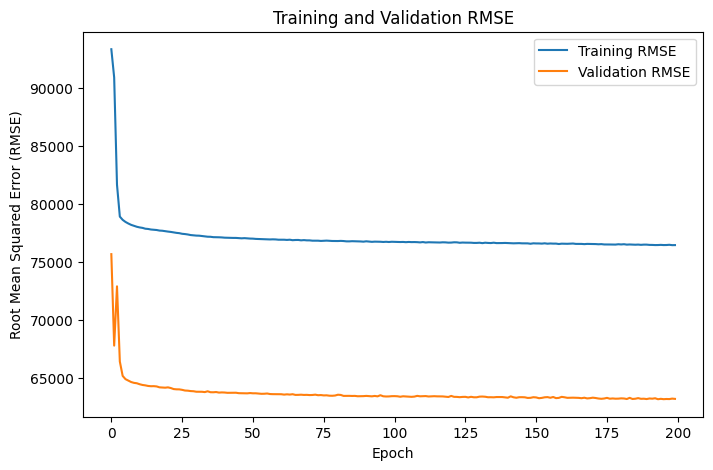

In [38]:
history_df = pd.DataFrame(history.history)
# Plotting the RMSE
plt.figure(figsize=(8, 5))
plt.plot(history_df['root_mean_squared_error'], label='Training RMSE')
plt.plot(history_df['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Training and Validation RMSE')
plt.legend()
plt.show()

### Evaluating Model

In [40]:
#Load evaluation data
cars_processed_test_path ='data/processed_test.csv'
cars_evaluation_df = pd.read_csv(cars_processed_test_path,index_col=None)
cars_evaluation_df

,id,vehicle_damage,binary_clean_title,turbo,fuel_type_2_Diesel,fuel_type_2_Electric,fuel_type_2_Gasoline,fuel_type_2_Hybrid,fuel_type_2_Other,engine_config_Flat,...,speed_8.0,speed_9.0,speed_10.0,ext_col_price_bin,int_col_price_bin,brand_price_bin,model_year,milage,hp,size
0,188533,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,4,2015,98000,240.0,2.0
1,188534,0.0,1,0,0,0,0,1,0,0,...,1,0,0,1,1,4,2020,9142,395.0,3.0
2,188535,0.0,0,1,0,0,0,0,1,0,...,0,0,1,1,2,3,2022,28121,300.0,3.5
3,188536,0.0,0,0,0,0,0,0,1,0,...,0,0,0,3,1,3,2016,61258,300.0,3.0
4,188537,0.0,1,0,0,0,1,0,0,0,...,0,0,0,2,1,3,2018,59000,252.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,4,2014,83315,362.0,3.0
125686,314219,0.0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,3,2019,29336,300.0,3.0
125687,314220,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,3,2012,77634,333.0,3.0
125688,314221,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,3,2012,112000,333.0,3.0


In [41]:
#Evaluating the model
x_evaluation = cars_evaluation_df[explanatory_variables]

# Predict on the evaluation set
y_evaluation_pred = nn_model.predict(x_evaluation)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 3s 750us/step


In [47]:
cars_evaluation_df['price'] = y_evaluation_pred

In [48]:
cars_evaluation_df

,id,vehicle_damage,binary_clean_title,turbo,fuel_type_2_Diesel,fuel_type_2_Electric,fuel_type_2_Gasoline,fuel_type_2_Hybrid,fuel_type_2_Other,engine_config_Flat,...,speed_9.0,speed_10.0,ext_col_price_bin,int_col_price_bin,brand_price_bin,model_year,milage,hp,size,price
0,188533,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2015,98000,240.0,2.0,16495.642578
1,188534,0.0,1,0,0,0,0,1,0,0,...,0,0,1,1,4,2020,9142,395.0,3.0,80230.179688
2,188535,0.0,0,1,0,0,0,0,1,0,...,0,1,1,2,3,2022,28121,300.0,3.5,58361.480469
3,188536,0.0,0,0,0,0,0,0,1,0,...,0,0,3,1,3,2016,61258,300.0,3.0,33637.210938
4,188537,0.0,1,0,0,0,1,0,0,0,...,0,0,2,1,3,2018,59000,252.0,2.0,29256.785156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2014,83315,362.0,3.0,24849.546875
125686,314219,0.0,0,1,0,0,0,0,1,0,...,0,0,1,1,3,2019,29336,300.0,3.0,42922.726562
125687,314220,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,3,2012,77634,333.0,3.0,19147.009766
125688,314221,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,3,2012,112000,333.0,3.0,16229.546875


In [49]:
# Convert Series to DataFrame
submission_columns = ['id','price']
submission_df =  cars_evaluation_df[submission_columns]
# Display the DataFrame
print(submission_df)

            id         price
0       188533  16495.642578
1       188534  80230.179688
2       188535  58361.480469
3       188536  33637.210938
4       188537  29256.785156
...        ...           ...
125685  314218  24849.546875
125686  314219  42922.726562
125687  314220  19147.009766
125688  314221  16229.546875
125689  314222  36312.984375

[125690 rows x 2 columns]


In [50]:
save_path = 'data/nn_submission1.csv'
submission_df.to_csv(save_path,index=False)